# How to detect fire with AI

Brought to you by Daniel Sikar daniel.sikar@city.ac.uk  
and  
City Data Science Society - https://www.datasciencesociety.city/

## Training a Convolutional Neural Network for a computer vision binary classification task
## Workshop Notes

## Environment
The accompanying [Jupyter Notebook] (https://github.com/CityDataScienceSociety/ComputerVisionWorkshops/blob/main/detect-fire-with-AI/src/Train.ipynb) can run locally or remotely. For the City Data Science Society workshop, it will run remotely on Google Colab, a Python development environment that run in the browser using Google Cloud, but may run locally if any participant wishes to do so.
Code runs in a cell. Formated text (markdown style) and images may also be added.
## Data
The dataset has been uploaded and shared on Google Drive and is downloaded to the Google Cloud where it is accessible to the Jupyter Notebook. A Google account (not necessarily email account) is required to download data into Colab.
If this is not desirable, see comment in code to download locally.
## Virtual Machine
Colab runs on a virtual machine, to see machine details run commands, preceded by exclamation mark, in a code cell:


## Downloading dataset onto Google Drive
When running the data download cell, a link will appear:


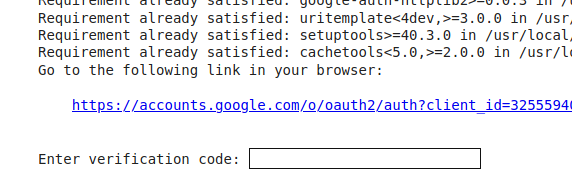

And a verification code, after Google sign in, is provided:

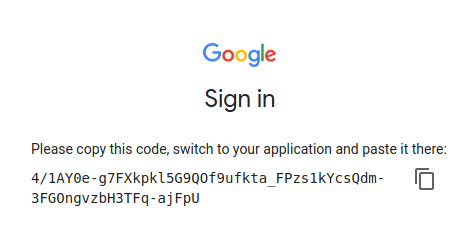





## Running Terminal commands

In [ ]:
!whoami
# Note commands below did not run on Google Colab
# !cat /proc/meminfo
# MemTotal:       32807580 kB ~ 32GB
# !cat /proc/cpuinfo # 12 core CPU
# model name	: Intel(R) Xeon(R) CPU E5-1650 v3 @ 3.50GHz
# !df -h
# Filesystem      Size  Used Avail Use% Mounted on
# udev             16G     0   16G   0% /dev

## Python modules
We'll use a number of modules: os, cv2, etc.
If running locally, modules may need to be installed e.g. for cv2:
```
!pip install opencv-python
```
## Coding
We'll load images:
```
img_no_fire = cv2.imread('datasets/nofire/20200724_175219_001.jpg')
```
And inspect data types:
```
print("\n\rimg_no_fire data type:", type(img_no_fire))
```
Define reusable code blocks as functions:
```
def create_training_data(IMG_SIZE, DATADIR, CATEGORIES):

(...)

  return training_data
```

## Understanding the problem at hand
Consider the OR truth table:

|  Input 1 | Input 2 | Output  |
| --- | --- | --- |
| 0  | 0  | 0  |
| 1  | 0  | 1  |
| 0  | 1  | 1  |
| 1  | 1  | 1  |

We would like to find (approximate) a function to help classify the outputs. 
Note, this could be written in code with a function such as:
```
def OR(x,y):
    if(x+y):
        return 1
    return 0
```
This is the *rules-based* traditional programming paradigm.

To help us visualise the data, we plot output classes (0 and 1) in a Cartesian plane:

In [ ]:
import numpy as np
or_array = np.asarray([[0,0,0],[1,0,1],[0,1,1],[1,1,1]])
# print(np.shape(or_array))
# (4, 3)
# indexes
xi = 0 # input 1
yi = 1 # input 2
oi = 2 # output
for i in range(0,np.shape(or_array)[0]):
    print(or_array[i][xi], or_array[i][yi], or_array[i][oi])

In [ ]:
# Alternatively - https://www.desmos.com/calculator
def plotOR(hyperplane):
    """
    Plot the OR truth table
    Inputs:
        hyperplane, boolean 
    Outputs:
        none
    """
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    # indexes
    xi = 0 # input 1
    yi = 1 # input 2
    oi = 2 # output

    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([-0.5,1.5])
    ax.set_ylim([-0.5,1.5])
    # initialize
    dot = ''
    for i in range(0,np.shape(or_array)[0]):
        if (or_array[i][oi]): # evaluates to boolean True/False
            dot = 'go' # green dots
        else:
            dot = 'ro' # red dot
        # plot
        ax.plot(or_array[i][xi], or_array[i][yi], dot)

    # *hyperplane* that separates both classes
    if (hyperplane):
        plt.plot([-0.5,1], [1, -0.5], linestyle='solid')

    ax.set(xlabel='Input 1', ylabel='Input 2',
           title='OR Truth Table')
    ax.grid()
    # figure can be saved if needed
    # fig.savefig("test.png")
    plt.show()

We need to find a line to separate *True* and *False* classes.  
Considering the line equation in slope intercept form  
$y=mx+b$  
where $x$ and $y$ are inputs* (given by data) and slope $m$ and intercept $b$ are the *parameters* we need to find to approximate the *OR* function:

In [ ]:
plotOR(False)
# plotOR(True)

In this case, parameters $m$ can be found with:  

$ m = \frac{y_2-y_1}{x_2-x_1} \\ 
m = -0.5 - 1 \div 1 - (-0.5) \\
m = -1.0 
$

Then by substitution using one of the x,y coordinate pairs:  

$ y = mx + b  \\  
1 = (-1 \times -0.5) + b \\
b = 0.5
$

Resulting in one solution, the line equation:  

$ y = -x + 0.5 $

In [ ]:
# Plotting the line sanity check

# https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
import matplotlib.pyplot as plt 
import numpy as np    

def plotline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    axes.set_aspect('equal', adjustable='box')
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])
    # create array of x values based on plot size
    x_vals = np.array(axes.get_xlim())
    # create corresponding y values based on line equation
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
plotline(-1,0.5)    

# Applying line equation to approximate OR function:

We change the line equation form:  

$ y = mx + b \\
-mx + y -  b = 0 \\
-mx + y - b > 0  
$


The $>$ sign is used such that when the expression evaluates to *True*, the input represented by coordinate pairs x,y is above the line and the ouput is 1. When the expression evaluates to *False*, the input represented by coordinate pairs x,y is below the line and the output is 0.


In [ ]:
def ORlineeq(x,y):
    m = -1
    b = 0.5
    return int((-m*x + y - b) > 0) 

def OR(x,y):
    if(x+y):
        return 1
    return 0

print("OR Truth Table - graphical solution")
for i in range(0,np.shape(or_array)[0]):
    print(or_array[i][xi], or_array[i][yi], ORlineeq(or_array[i][xi], or_array[i][yi]))
print("OR Truth Table - rules base solution")  
for i in range(0,np.shape(or_array)[0]):
    print(or_array[i][xi], or_array[i][yi], OR(or_array[i][xi], or_array[i][yi]))
    

## The AND function
|  Input 1 | Input 2 | Output  |
| --- | --- | --- |
| 0  | 0  | 0  |
| 1  | 0  | 0  |
| 0  | 1  | 0  |
| 1  | 1  | 1  |

In [ ]:
def plotAND(hyperplane):
    """
    Plot the OR truth table
    Inputs:
        hyperplane, boolean 
    Outputs:
        none
    """
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    # And array ~ labelled data
    and_array = np.asarray([[0,0,0],[1,0,0],[0,1,0],[1,1,1]])
    # indexes
    xi = 0 # input 1
    yi = 1 # input 2
    oi = 2 # output

    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([-0.5,1.5])
    ax.set_ylim([-0.5,1.5])
    # initialize
    dot = ''
    for i in range(0,np.shape(and_array)[0]):
        if (and_array[i][oi]): # evaluates to boolean True/False
            dot = 'go' # green dots
        else:
            dot = 'ro' # red dot
        # plot
        ax.plot(and_array[i][xi], and_array[i][yi], dot)

    # *hyperplane* that separates both classes
    if (hyperplane):
        plt.plot([-0.5,2], [2, -0.5], linestyle='solid')

    ax.set(xlabel='Input 1', ylabel='Input 2',
           title='OR Truth Table')
    ax.grid()
    # figure can be saved if needed
    # fig.savefig("test.png")
    plt.show()

In [ ]:
plotAND(True)

In [ ]:
# Sanity check
plotline(-1,1.5) 

In [ ]:
def ANDlineeq(x,y):
    # y > mx + b
    m = -1
    b = 1.5
    return int((-m*x + y - b) > 0) 

def AND(x,y):
    if(x+y==2):
        return 1
    return 0

and_array = np.asarray([[0,0,0],[1,0,0],[0,1,0],[1,1,1]])

print("AND Truth Table - graphical solution")
for i in range(0,np.shape(or_array)[0]):
    print(and_array[i][xi], and_array[i][yi], ANDlineeq(and_array[i][xi], and_array[i][yi]))
print("AND Truth Table - rules base solution")  
for i in range(0,np.shape(and_array)[0]):
    print(and_array[i][xi], and_array[i][yi], AND(and_array[i][xi], and_array[i][yi]))

In [ ]:
def Weirdlineeq(x,y):
    m = 1
    b = 0.5
    return int((-m*x + y - b) > 0) 

def Weird(x,y):
    if(x==0 and y==1):
        return 1
    return 0

# 0 and 1 evaluate to true
weird_array = np.asarray([[0,0,0],[1,0,0],[0,1,1],[1,1,0]])

print("WEIRD Truth Table - graphical solution")
for i in range(0,np.shape(weird_array)[0]):
    print(weird_array[i][xi], weird_array[i][yi], Weirdlineeq(weird_array[i][xi], weird_array[i][yi]))
print("WEIRD Truth Table - rules base solution")  
for i in range(0,np.shape(weird_array)[0]):
    print(weird_array[i][xi], weird_array[i][yi], Weird(weird_array[i][xi], weird_array[i][yi]))

In [ ]:
def Weird2lineeq(x,y): # breaks - rules required...
    m = 1
    b = -0.5
    return int((-m*x + y - b) < 0) # invert logic, positive slope, class below line is true

def Weird2(x,y):
    if(x==1 and y==0):
        return 1
    return 0

# 1 and 0 evaluate to true
weird2_array = np.asarray([[0,0,0],[1,0,1],[0,1,0],[1,1,0]])

print("WEIRD Truth Table - graphical solution")
for i in range(0,np.shape(weird2_array)[0]):
    print(weird2_array[i][xi], weird2_array[i][yi], Weird2lineeq(weird2_array[i][xi], weird2_array[i][yi]))
print("WEIRD Truth Table - rules base solution")  
for i in range(0,np.shape(weird2_array)[0]):
    print(weird_array[i][xi], weird_array[i][yi], Weird2(weird_array[i][xi], weird_array[i][yi]))

In [ ]:
# Todo McCullough-Pitts neuron
# Feed forward Neural Networks
# Convolutional Networks